<a href="https://colab.research.google.com/github/dimLMT/ML-assignment/blob/main/PCA_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns',None)
#  Sklearn Display
from sklearn import set_config
set_config(transform_output='pandas')
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Preprocess the Data

In [ ]:
fpath = '/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week17/Data/NHANES_Diet_Diabetes_Risk.xls.csv'
df = pd.read_csv(fpath)
df.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V,Diabetes_Risk
0,73557,16888.32786,12930.89065,1,49.0,2.0,2.0,6.0,2.0,1.0,1.0,13.0,3.0,2.0,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1574.0,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,209.0,3.92,0.0,70.0,110.0,60.0,304.0,278.0,1398.0,430.0,1.057,1.216,11.804,0.951,285.0,66.0,219.0,330.0,216.3,2.79,0.00,241.4,3.3,29.2,949.0,756.0,206.0,8.41,8.85,1.072,1323.0,2228.0,62.5,203.0,36.0,0.0,2701.79,0.219,0.099,0.103,0.153,0.346,1.221,9.694,5.408,1.173,16.796,0.121,0.001,7.932,0.769,0.000,0.094,0.001,0.000,0.010,2.0,960.0,960.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,73558,17932.14387,12684.14887,1,59.0,2.0,2.0,4.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5062.0,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,2584.0,20.94,0.0,1477.0,1488.0,0.0,145.0,12.0,0.0,899.0,4.178,5.168,65.396,4.415,1243.0,601.0,641.0,1662.0,2149.0,21.45,0.00,2.3,15.2,23.4,3193.0,6427.0,903.0,26.88,30.36,4.130,9726.0,4930.0,715.8,240.0,0.0,119.0,6779.99,1.872,1.160,0.802,1.286,1.297,6.516,27.952,12.107,2.208,32.429,0.086,0.000,15.483,1.774,0.007,0.728,1.003,0.104,1.139,2.0,360.0,360.0,0.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2
2,73559,59641.81293,39394.23671,1,49.0,2.0,2.0,18.0,6.0,1.0,1.0,13.0,1.0,1.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,88.0,8.87,0.0,616.0,655.0,21.0,449.0,35.0,515.0,300.0,1.648,1.747,18.342,1.906,423.0,290.0,133.0,625.0,161.2,3.78,1.42,195.1,4.0,40.4,877.0,1198.0,210.0,17.57,8.98,0.949,2943.0,1694.0,98.3,45.0,71.0,0.0,3766.70,0.358,0.128,0.371,0.455,3.008,2.067,10.691,7.497,0.531,19.910,0.164,0.005,11.705,1.092,0.000,0.042,0.001,0.006,0.002,2.0,1254.0,0.0,1254.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,73561,59052.35703,39004.89299,1,63.0,2.0,2.0,18.0,1.0,1.0,1.0,13.0,4.0,Na

In [ ]:
print(df.shape)
df = df.set_index("SEQN")
df.info(verbose=True)

(6643, 169)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6643 entries, 73557 to 83729
Data columns (total 168 columns):
 #    Column         Dtype  
---   ------         -----  
 0    WTDRD1         float64
 1    WTDR2D         float64
 2    DR1DRSTZ       int64  
 3    DR1EXMER       float64
 4    DRABF          float64
 5    DRDINT         float64
 6    DR1DBIH        float64
 7    DR1DAY         float64
 8    DR1LANG        float64
 9    DR1MNRSP       float64
 10   DR1HELPD       float64
 11   DBQ095Z        float64
 12   DBD100         float64
 13   DRQSPREP       float64
 14   DR1STY         float64
 15   DR1SKY         float64
 16   DRQSDIET       float64
 17   DRQSDT1        float64
 18   DRQSDT2        float64
 19   DRQSDT3        float64
 20   DRQSDT4        float64
 21   DRQSDT5        float64
 22   DRQSDT6        float64
 23   DRQSDT7        float64
 24   DRQSDT8        float64
 25   DRQSDT9        float64
 26   DRQSDT10       float64
 27   DRQSDT11       float64
 28  

In [ ]:
# Define X and y
target = "Diabetes_Risk"
X = df.drop([target], axis=1)
y = df[target]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
X_train.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78727,70710.30601,46705.128430,1,59.0,2.0,2.0,1.0,7.0,1.0,1.0,13.0,4.0,NaN,3.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1339.0,50.73,211.40,77.68,15.8,34.75,11.780,10.515,8.776,63.0,2.54,0.0,246.0,294.0,164.0,509.0,7.0,303.0,827.0,1.320,1.811,17.034,1.509,416.0,207.0,209.0,560.0,147.9,3.29,1.4,139.6,2.7,95.9,629.0,845.0,215.0,16.77,7.06,1.037,2251.0,1820.0,74.8,97.0,30.0,0.0,2021.37,0.254,0.140,0.094,0.182,0.233,0.943,6.558,2.773,0.449,7.519,0.088,0.016,7.917,0.814,0.000,0.018,0.000,0.000,0.000,1.0,960.0,0.0,960.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,1.0,5.0,2.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
82233,60907.62017,88806.191190,1,25.0,2.0,2.0,0.0,5.0,1.0,1.0,13.0,3.0,3.0,1.0,1.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,858.0,45.09,105.41,16.39,5.7,27.83,9.012,9.554,6.515,253.0,1.96,0.0,226.0,233.0,0.0,97.0,5.0,448.0,424.0,3.000,2.110,15.608,0.758,276.0,177.0,97.0,399.0,223.5,1.03,0.0,3.5,2.3,12.3,759.0,833.0,156.0,7.39,3.87,0.516,1524.0,1265.0,92.1,288.0,0.0,0.0,4181.51,0.234,0.143,0.086,0.185,0.198,0.664,5.207,2.191,0.390,8.977,0.055,0.002,5.875,0.389,0.000,0.131,0.002,0.007,0.033,2.0,1521.0,0.0,1521.0,4.0,1.0,2.0,NaN,1.0,2.0,2.0,NaN,1.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,1.0,4.0,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,1.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,4.0,2.0,NaN,2.0
74032,46703.93997,173276.611500,1,2.0,2.0,2.0,3.0,1.0,1.0,1.0,13.0,4.0,NaN,3.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1356.0,59.90,167.90,115.17,5.2,50.45,23.208,15.741,4.577,166.0,1.83,0.0,249.0,266.0,39.0,181.0,16.0,1809.0,83.0,0.567,1.865,8.027,1.200,127.0,50.0,77.0,160.0,194.0,5.51,0.0,20.5,1.4,23.1,1059.0,1091.0,163.0,6.02,9.06,0.573,2110.0,1932.0,62.7,52.0,109.0,0.0,2263.56,0.683,0.397,0.240,0.554,0.647,2.603,11.196,6.093,0.823,9.511,0.095,0.000,4.053,0.427,0.001,0.069,0.003,0.006,0.001,2.0,1275.0,1275.0,0.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<Axes: >

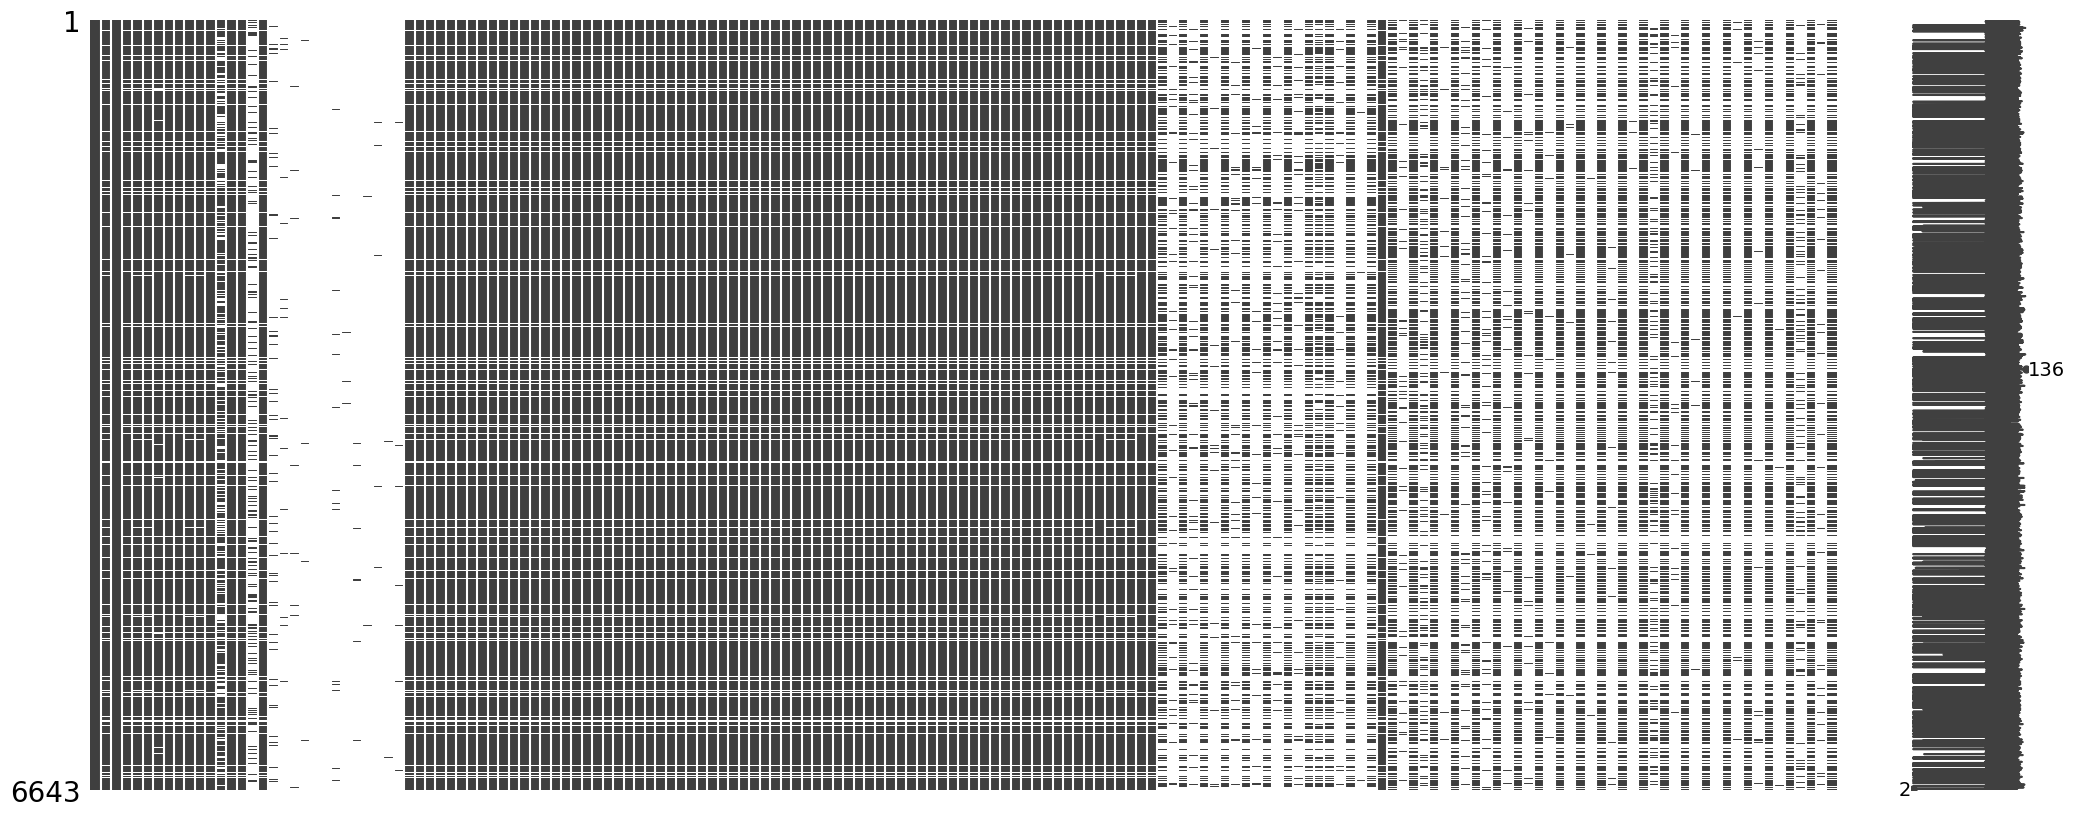

In [ ]:
import missingno as msno
msno.matrix(X)

In [ ]:

# Save list of column names
num_cols = X_train.select_dtypes("number").columns
# Fill in nulls with the median value
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
num_pipe = make_pipeline(imputer,scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
# Instantiate the make column transformer
col_transformer = ColumnTransformer([num_tuple],
                                    verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=167))],
                  verbose_feature_names_out=False)

In [ ]:
# fit the column transformer on X_train
col_transformer.fit(X_train)
# Transform X_train and X_test
X_train_tf = col_transformer.transform(X_train)
X_test_tf = col_transformer.transform(X_test)
X_train_tf.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78727,0.828246,0.121669,-0.295989,0.759244,0.0,0.338808,-1.340234,1.195759,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.165331,0.189828,-0.046713,-1.392493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929421,-0.758725,-0.672011,-0.332717,-0.434149,-0.060394,-0.974490,-0.868066,-0.995841,-0.768236,-0.944910,-0.784441,-0.182283,-0.397301,-0.527561,-0.157457,-0.349554,-0.191218,-0.523296,-0.174656,-0.295260,-0.169375,-0.500534,-0.329495,0.099950,0.155586,-0.008694,0.120494,-0.858353,-0.294733,0.135529,0.725962,-0.317788,-0.076778,-0.521441,-0.715887,-0.470291,0.296875,-0.535747,-0.178185,-0.676239,-0.566705,-0.576168,-0.137096,-0.059317,-0.314379,-0.465338,-0.453361,-0.522445,-0.587963,-0.687662,-0.452383,-0.656052,-0.879856,-0.871470,-0.741789,-1.102298,-0.730306,-0.118145,-0.741537,-0.676227,-0.271813,-1.008897,-0.283217,-0.665468,-0.335157,-1.408045,-0.070409,-0.548627,0.559998,-0.244488,0.513763,0.24952,-0.129403,0.326150,-0.146950,0.15643,-0.063156,0.239844,-0.091253,0.193609,-0.106391,0.20504,-0.090343,0.239375,-0.10283,-0.249066,-0.097381,0.173753,-0.087421,0.049137,-0.027836,0.0,-0.473916,0.265908,-0.138889,-1.830599,2.224798,0.118509,-0.059742,0.329903,-0.012884,-3.540910,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,0.408678,-0.101500,0.203975,-0.030765,0.0
82233,0.579175,0.890047,-0.295989,-0.965540,0.0,0.338808,-1.429137,0.240609,-0.256418,-0.073655,0.079215,-0.035916,1.737711,-1.812684,-1.192806,0.433627,0.145392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.587796,-1.251760,-0.800935,-1.194710,-1.250417,-1.052084,-1.124673,-1.042537,-1.051694,-0.942262,-0.127315,-0.858855,-0.182283,-0.448869,-0.637360,-0.301731,-0.449779,-0.196408,-0.504781,-0.288864,1.562895,0.054883,-0.586687,-0.782055,-0.455514,-0.004585,-0.795672,-0.316808,-0.483016,-0.742556,-0.319102,-0.843666,-0.388825,-0.577888,-0.294394,-0.733180,-0.859409,-0.803800,-1.000292,-0.883011,-1.096029,-1.026318,-0.320111,0.960968,-0.409841,-0.314379,1.023260,-0.497314,-0.512087,-0.618838,-0.680640,-0.480355,-0.814777,-1.040054,-1.019841,-0.816849,-1.010564,-0.837660,-0.274660,-0.916439,-0.993769,-0.271813,-0.168771,-0.264269,-0.467767,-0.155440,-0.189972,0.427542,-0.548627,1.183541,

## ​Fit a default KNN model to the data (No PCA)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Instantiate default KNN
knn = KNeighborsRegressor()
knn.fit(X_train_tf, y_train)

KNeighborsRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# the custom evaluation function to get the metrics for your model
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [ ]:
# Record the time it takes to make predictions
%%time
preds = knn.predict(X_test_tf)

CPU times: user 440 ms, sys: 8.97 ms, total: 449 ms
Wall time: 555 ms


In [ ]:
evaluate_regression(knn, X_train_tf, y_train, X_test_tf, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.352
- MSE = 0.302
- RMSE = 0.550
- R^2 = 0.211
------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 0.423
- MSE = 0.414
- RMSE = 0.644
- R^2 = -0.127


## Fit a default KNN model to the data (With PCA)

In [ ]:
# Check for class balance of target
y_train.value_counts()

0    4085
2     460
1     437
Name: Diabetes_Risk, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train_tf, y_train)
y_train_sm.value_counts()

2    4085
1    4085
0    4085
Name: Diabetes_Risk, dtype: int64

In [ ]:
# Instantiate & Transform the data with PCA to keep 95% of the variance
pca = PCA(n_components=0.95)
X_train_sm_pca = pca.fit_transform(X_train_sm)
X_test_pca = pca.transform(X_test_tf)
X_train_sm_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80,pca81,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94,pca95
0,-3.099471,0.997939,-1.787840,-1.023698,-0.196345,0.465536,-0.174055,-0.185927,0.633373,-0.558134,-0.551735,-0.783355,-0.138312,-0.412991,-0.024191,-0.348441,0.343304,0.797411,0.615781,-0.050954,-0.673045,-0.025046,-0.021888,-0.526523,0.095971,0.461749,0.625072,-0.471195,-0.586497,-0.793372,0.183026,1.178905,-0.031864,-1.405298,-0.423947,-1.701269,1.355231,-0.443031,0.328896,-0.177248,-1.172859,0.674740,0.502809,-0.852120,-0.716377,0.577068,0.003730,1.018470,0.027368,0.560772,0.572030,-1.432664,0.346303,-0.474470,0.384843,0.279448,0.112389,1.297515,0.320410,0.659393,-0.956859,0.711619,-0.179742,0.318528,0.130169,1.216683,0.497111,-0.309498,0.862853,-0.644385,-0.356139,-0.171246,-0.084403,0.876523,0.088748,0.123195,-0.872400,-0.379333,0.403407,0.030938,0.176719,-0.111764,-0.205010,-0.525055,-0.363873,0.488911,-0.259165,0.261673,-0.000007,0.009104,-0.178792,-0.306589,-0.620188,-0.141491,0.226543,-0.118523
1,-3.847817,2.005039,-1.277852,-2.422083,0.534584,-2.667013,-2.175876,-0.707279,0.915926,1.655633,0.410047,1.456115,0.101872,0.906897,-0.532577,1.784523,1.174072,-0.233321,1.912478,0.848846,-1.267442,0.071360,-1.601096,-2.474266,1.705653,-0.098949,0.833984,-0.116755,0.815512,0.748896,1.593129,0.731975,-0.782617,0.727818,-0.301269,-0.751086,-0.229599,0.022348,1.242232,0.364926,1.089873,1.659710,0.249610,-0.562783,-0.111004,-1.609886,0.726821,0.121783,1.339967,-0.064633,-0.846516,-1.096940,0.274157,0.589110,0.003513,0.484898,-0.664076,-0.963038,-0.165999,0.548260,-1.235792,0.774634,-0.555476,0.395023,0.897578,-0.976659,-0.455706,0.282400,0.454074,-0.414294,-0.677560,0.699373,-0.357344,-0.234192,0.875123,-0.898166,0.508807,0.304487,0.419798,-0.252007,-0.096953,0.085142,-0.944411,-1.257776,0.296554,0.028876,-0.457284,0.068187,-0.223196,0.565965,0.376218,0.251619,0.631257,0.203358,-0.216264,0.778031
2,-3.100002,-1.630026,0.153350,-1.493162,1.746308,0.299648,0.281422,-0.368663,1.053594,-0.564318,0.339329,-0.156180,-0.020653,0.013282,-0.423440,-0.022431,0.778542,-0.891654,0.695872,0.132310,-1.147369,-0.517237,0.137915,0.248888,0.705253,0.135805,0.522772,0.470817,0.640194,0.362596,-1.412058,-1.305364,0.679237,-0.373135,-0.169012,0.558943,-0.085247,0.701507,0.293750,0.229997,1.132684,0.553987,0.768135,0.308185,0.828452,0.045822,-0.029123,-0.086333,0.441759,0.200130,-0.396009,0.166936,-0.003451,-0.040861,0.274664,0.137226,-0.785523,0.261453,0.110113,-0.267739,0.088516,-0.467648,-0.398505,0.303580,0.319019,0.332861,0.194398,-0.401719,-0.173701,-0.542997,-0.112494,0.041583,0.193751,0.044479,0.143219,0.165293,-0.007073,0.104348,0.078821,-0.270229,0.252356,0.552610,0.072194,0.425982,-0.120180,0.187626,-0.386691,0.384136,-0.159734,-0.451873,-0.266849,-0.682012,0.142471,0.259762,0.450348,-0.605000
3,0.408327,0.888534,-0.679363,1.503493,-1.894172,0.864228,-0.160373,-0.069926,0.182402,-0.368250,-0.608280,-0.198945,0.199926,-0.240603,-0.019916,-0.050766,0.254529,-0.300261,-0.052536,0.100785,-0.338588,0.135420,-0.013059,-0.063744,0.154970,-0.283196,0.226434,0.343853,0.082487,0.401507,-0.446250,-0.429410,0.185732,0.250673,0.740144,-0.343008,-0.177152,-0.351056,0.433394,0.911131,0.078397,-0.242400,0.457467,0.179880,0.656609,0.419673,1.003074,1.214099,0.129912,0.062821,-0.767548,-0.098210,-0.509429,0.110290,-0.164504,-0.709077,-0.150502,-0.528706,-1.116051,1.164555,-0.026156,0.140225,-0.468689,0.671597,-0.272616,0.350629,-0.064174,-0.621136,-0.893022,-0.583119,0.136083,0.281281,0.486287,-0.033

In [ ]:
#​​Fit a default KNN model to the PCA data
knn.fit(X_train_sm_pca, y_train_sm)

KNeighborsRegressor()

In [ ]:
# Record the time it takes to make predictions with PCA data
%%time
preds_pca = knn.predict(X_test_pca)

CPU times: user 468 ms, sys: 5.51 ms, total: 473 ms
Wall time: 534 ms


In [ ]:
evaluate_regression(knn, X_train_sm_pca, y_train_sm, X_test_pca, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.300
- MSE = 0.330
- RMSE = 0.574
- R^2 = 0.506
------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 0.866
- MSE = 1.084
- RMSE = 1.041
- R^2 = -1.950


Q1. How many features were used in the first model, and how many PCs were used in the PCA model?
>>> 168 in the regular model and 96 in the PCA model

Q2. Which model performed the best on the test set?
>>> the regular model, which has larger R^2 for the test set

Q3. Which model was the fastest at making predictions?
>>> surprisingly, the regular one is faster